<a href="https://colab.research.google.com/github/Ocrabit/Hackathon2024/blob/main/ZipCodeConversionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install uszipcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=eda72c38592b3d0049013295d0da2d11d588b4b6394881ca67404b1bfb59c3ba
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.29
    Uninstalling SQLAlchemy-2.0.29:
      Successfully uninstalled SQLAlchemy-2.0.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.

In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from uszipcode import SearchEngine

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
df_income_zipcode = pd.read_csv('/content/drive/MyDrive/Hackathons/4 5 24/Datasets/Transportation Data April 5/IRSIncomeByZipCode.csv')
df_rt_bus = pd.read_csv('/content/drive/MyDrive/Hackathons/4 5 24/Datasets/Transportation Data April 5/Regional_Transportation_Authority_Bus_Stops_20240402.csv')
df_weGo_bus = pd.read_csv('/content/drive/MyDrive/Hackathons/4 5 24/Datasets/Transportation Data April 5/WeGo_Transit_Bus_Stops_20240402.csv')
df_SDoH = pd.read_csv('/content/drive/MyDrive/Hackathons/4 5 24/Datasets/Transportation Data April 5/SDoH_TN_zipcode_2015-2020.csv')

In [ ]:
print("init",len(df_weGo_bus))
df_dropedNa = df_weGo_bus.dropna(subset=['Mapped Location'])
print("end",len(df_dropedNa))

data = df_dropedNa['Mapped Location'].str.strip('()').str.split(',').str[:2]
data.head()
geom = pd.DataFrame(data.tolist(), columns=['lat', 'long'], index=df_dropedNa.index) \
         .apply(pd.to_numeric, errors='coerce')
df_filteredLatLon = df_dropedNa.join(geom)

init 2578
end 2524


In [ ]:
def getZipCode(lat, lon):
  try:
    search = SearchEngine()
    result = search.by_coordinates(lat=lat,lng=lon, returns=1)
    return result[0].zipcode
  except:
    return 'Nan'

In [ ]:
zipCodes = []
for i,row in df_filteredLatLon.iterrows():
    zipCodes += [getZipCode(row['lat'],row['long'])]

df_filteredLatLon['ZipCodes'] = zipCodes
df_filteredLatLon['ZipCodes'].value_counts()

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


Exception ignored in: <function SearchEngine.__del__ at 0x7f20f03b53f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
    self.close()
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
    self.ses.close()
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
    self._close_impl(invalidate=False)
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
    transaction.close(invalidate)
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
    transaction.close()
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
    self._do_close()
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
    self._close_impl()
  File "/usr/local/lib/python3.10/dist-packag

ZipCodes
37208    232
37203    190
37212    184
37206    166
37211    147
37210    136
37245    135
37228    134
37207    132
37213    117
37216    111
37115     98
37204     97
37201     88
37217     86
37013     74
37214     74
37138     67
37218     66
37205     63
37221     33
37072     22
37130     16
37086     12
37076     11
37167     11
37220      9
37215      8
37189      5
Name: count, dtype: int64

In [ ]:
numStops = [232,190,136,134,132]
zips = [37208,37203,37210,37228,37207]
dfnew = pd.DataFrame(data={'zip': zips, 'numStops': numStops})

<ipython-input-25-83f67a6149fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfnew, x='zip', y='numStops',palette='rocket')


Text(0.5, 1.0, 'Stops by Low Income Zip Codes')

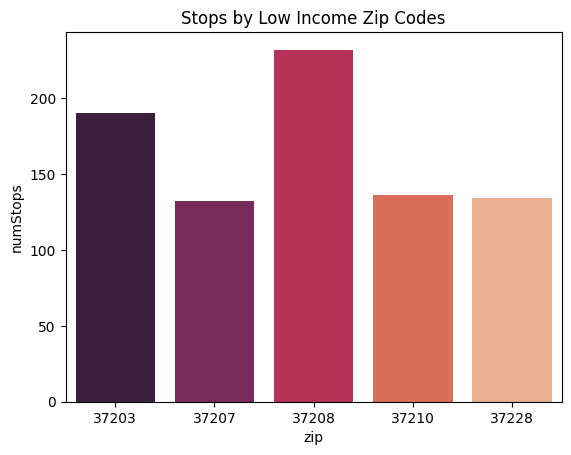

In [ ]:
sns.barplot(data=dfnew, x='zip', y='numStops',palette='rocket')
plt.title("Stops by Low Income Zip Codes")